In [1]:
import openbabel
from openbabel import pybel
import csv,sys
import pandas as pd
import numpy as np

In [2]:
# The functional group distribution is analysed in a similar fashion as used by 
# S. Boobier, D. R. J. Hose, A. J. Blacker and B. N. Nguyen, Nat Commun, 2020, 11, 5753.
# https://doi.org/10.1038/s41467-020-19594-z
# the core code to count functional groups can be found in the ESI of the publication 

#get SMARTS and Dataset
#file with column called “FG” with list of FGs to analyse, and column called “SMARTS” of SMARTS codes
SMARTS1=pd.read_csv('/Users/jiayun/Documents/work/outliers/SMARTS.csv') 

In [3]:
SMARTS1['SMARTS']

0                                           [F,Cl,Br,I]
1                                                   [F]
2                                                  [Cl]
3                                                  [Br]
4                                                   [I]
5                                           [CX3]=[OX1]
6                                     [#6][CX3](=O)[#6]
7                                       [CX3H1](=O)[#6]
8                                [NX3][CX3](=[OX1])[#6]
9                              [#6][CX3](=O)[OX2H0][#6]
10                                     [CX3](=O)[OX2H1]
11    [$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([...
12                                         [$([CX2]#C)]
13                     [$([cX3](:*):*),$([cX2+](:*):*)]
14                                          [NX1]#[CX2]
15                                 [NX3;H2,H1;!$(NC=O)]
16              [$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]
17                                          [NX2

In [4]:
#load dataset 
fps_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/fps_xgboost_esol_outliers2.csv')
m2v_xgb_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/m2v_xgboost_esol_outliers2.csv')
bert_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert_esol_outliers2.csv')
bert2_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert2_esol_outliers2.csv')

In [5]:
len(fps_d2)

72

In [6]:
len(m2v_xgb_d2)

63

In [7]:
len(bert_d2)

62

In [8]:
len(bert2_d2)

47

In [9]:
#outputfile
Output="FG_esol_fps_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=fps_d2['SMILES']
fps_d2=np.array(fps_d2)
FG_list=[]

for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    
#for each molecule
for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)    

In [10]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CC1CCCO1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,CCCCC(C)CC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Clc1ccc(cc1)c2ccc(Cl)cc2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCN(CC)C(=O)CSc1ccc(Cl)nn1,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CCC(C(CC)c1ccc(O)cc1)c2ccc(O)cc2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
68,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
70,CCOP(=S)(OCC)ON=C(C#N)c1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [11]:
FG_sum_fps_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_fps_d2_merge = (FG_sum_fps_d2.to_frame('fps_d2'))/len(fps_d2)

In [12]:
#outputfile
Output="FG_esol_m2v_xgb_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=m2v_xgb_d2['SMILES']
m2v_xgb_d2=np.array(m2v_xgb_d2)
FG_list=[]

for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [13]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CCCC(C)(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC1CCCO1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,CCCCC(C)CC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,COc1ccc(cc1)C(O)(C2CC2)c3cncnc3,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
4,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,COP(=S)(OC)Oc1cc(Cl)c(I)cc1Cl,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
59,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
61,Cc3cc2nc1c(=O)[nH]c(=O)nc1n(CC(O)C(O)C(O)CO)c2...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [14]:
FG_sum_m2v_xgb_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_m2v_xgb_d2_merge = (FG_sum_m2v_xgb_d2.to_frame('m2v_xgb_d2'))/len(m2v_xgb_d2)

In [15]:
#outputfile
Output="FG_esol_bert_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert_d2['smiles']
bert_d2=np.array(bert_d2)
FG_list=[]

for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [16]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CN(C)C(=O)N(C)C,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,CC1CC(C)C(=O)C(C1)C(O)CC2CC(=O)NC(=O)C2,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,CC1CO1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,OC(Cn1cncn1)(Cn2cncn2)c3ccc(F)cc3F,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,CCN(CC)c1c(cc(c(N)c1N(=O)=O)C(F)(F)F)N(=O)=O,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
58,Nc2nc1[nH]cnc1c(=O)[nH]2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
59,CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
60,CCOP(=S)(OCC)Oc1ccc(cc1)S(C)=O,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [17]:
FG_sum_bert_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert_d2_merge = (FG_sum_bert_d2.to_frame('bert_d2'))/len(bert_d2)

In [18]:
#outputfile
Output="FG_esol_bert2_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert2_d2['smiles']
bert2_d2=np.array(bert2_d2)
FG_list=[]

for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [19]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,Cc1cc(cc(N(=O)=O)c1O)N(=O)=O,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,CCOP(=S)(OCC)N2C(=O)c1ccccc1C2=O,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,O=N(=O)OCC(CON(=O)=O)ON(=O)=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,CCCC1COC(Cn2cncn2)(O1)c3ccc(Cl)cc3Cl,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
5,Cc1c(C)c(C)c(C)c(C)c1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ClC(Cl)C(Cl)Cl,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CN(C)c2c(C)n(C)n(c1ccccc1)c2=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,Cc1cc(=O)n(c2ccccc2)n1C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,CN2C(=O)CN=C(c1ccccc1)c3cc(Cl)ccc23,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [20]:
FG_sum_bert2_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert2_d2_merge = (FG_sum_bert2_d2.to_frame('bert2_d2'))/len(bert2_d2)

In [21]:
FG_sum_bert2_d2_merge

,bert2_d2
Halides,0.382979
F,0.085106
Cl,0.340426
Br,0.000000
I,0.000000
Carbonyl,0.297872
Ketone,0.000000
Aldehyde,0.000000
Amide,0.170213
Ester,0.127660


In [22]:
FG_sum_esol = pd.read_parquet('FG_sum_esol.parquet')

In [23]:
FG_sum_fps_d2_merge ['m2v_xgb_d2'] =  FG_sum_m2v_xgb_d2_merge
FG_sum_fps_d2_merge ['bert_d2'] =  FG_sum_bert_d2_merge
FG_sum_fps_d2_merge ['bert2_d2'] =  FG_sum_bert2_d2_merge
FG_sum_fps_d2_merge ['esol'] =  FG_sum_esol/1144

In [24]:
FG_sum_fps_d2_merge

,fps_d2,m2v_xgb_d2,bert_d2,bert2_d2,esol
Halides,0.319444,0.238095,0.161290,0.382979,0.298951
F,0.055556,0.063492,0.048387,0.085106,0.041084
Cl,0.277778,0.174603,0.096774,0.340426,0.226399
Br,0.027778,0.000000,0.016129,0.000000,0.043706
I,0.000000,0.015873,0.000000,0.000000,0.013986
Carbonyl,0.291667,0.317460,0.467742,0.297872,0.351399
Ketone,0.027778,0.031746,0.048387,0.000000,0.075175
Aldehyde,0.000000,0.000000,0.032258,0.000000,0.014860
Amide,0.125000,0.126984,0.225806,0.170213,0.137238
Ester,0.111111,0.111111,0.145161,0.127660,0.086538


Text(0, 0.5, 'Average occurance/molecule')

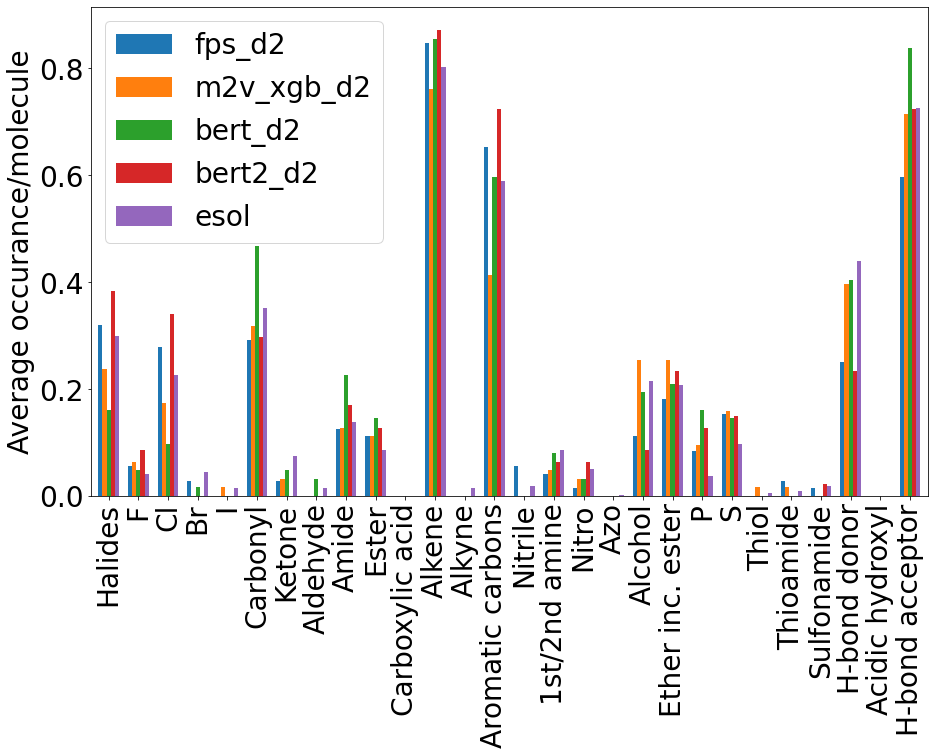

In [25]:
import matplotlib.pyplot as plt
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge.plot.bar(figsize=(15,9), width=0.7)
ax.set_ylabel("Average occurance/molecule", size=28)

In [26]:
FG_sum_fps_d2_merge['Morgan Fps'] = FG_sum_fps_d2_merge['fps_d2']-FG_sum_fps_d2_merge['esol']
FG_sum_fps_d2_merge['Mol2Vec/XGBoost'] = FG_sum_fps_d2_merge['m2v_xgb_d2']-FG_sum_fps_d2_merge['esol']
FG_sum_fps_d2_merge['ChemBerta_zinc_base_v1'] = FG_sum_fps_d2_merge['bert_d2']-FG_sum_fps_d2_merge['esol']
FG_sum_fps_d2_merge['ChemBerta_77M_MTR'] = FG_sum_fps_d2_merge['bert2_d2']-FG_sum_fps_d2_merge['esol']

In [27]:
FG_sum_fps_d2_merge_change = FG_sum_fps_d2_merge[['Morgan Fps', 'Mol2Vec/XGBoost', 'ChemBerta_zinc_base_v1', 'ChemBerta_77M_MTR']]

In [28]:
FG_sum_fps_d2_merge_change

,Morgan Fps,Mol2Vec/XGBoost,ChemBerta_zinc_base_v1,ChemBerta_77M_MTR
Halides,0.020493,-0.060856,-0.137661,0.084028
F,0.014472,0.022408,0.007303,0.044022
Cl,0.051379,-0.051795,-0.129624,0.114027
Br,-0.015929,-0.043706,-0.027577,-0.043706
I,-0.013986,0.001887,-0.013986,-0.013986
Carbonyl,-0.059732,-0.033938,0.116343,-0.053526
Ketone,-0.047397,-0.043429,-0.026788,-0.075175
Aldehyde,-0.014860,-0.014860,0.017398,-0.014860
Amide,-0.012238,-0.010254,0.088569,0.032975
Ester,0.024573,0.024573,0.058623,0.041121


Text(0, 0.5, 'Change of average occurance/molecule')

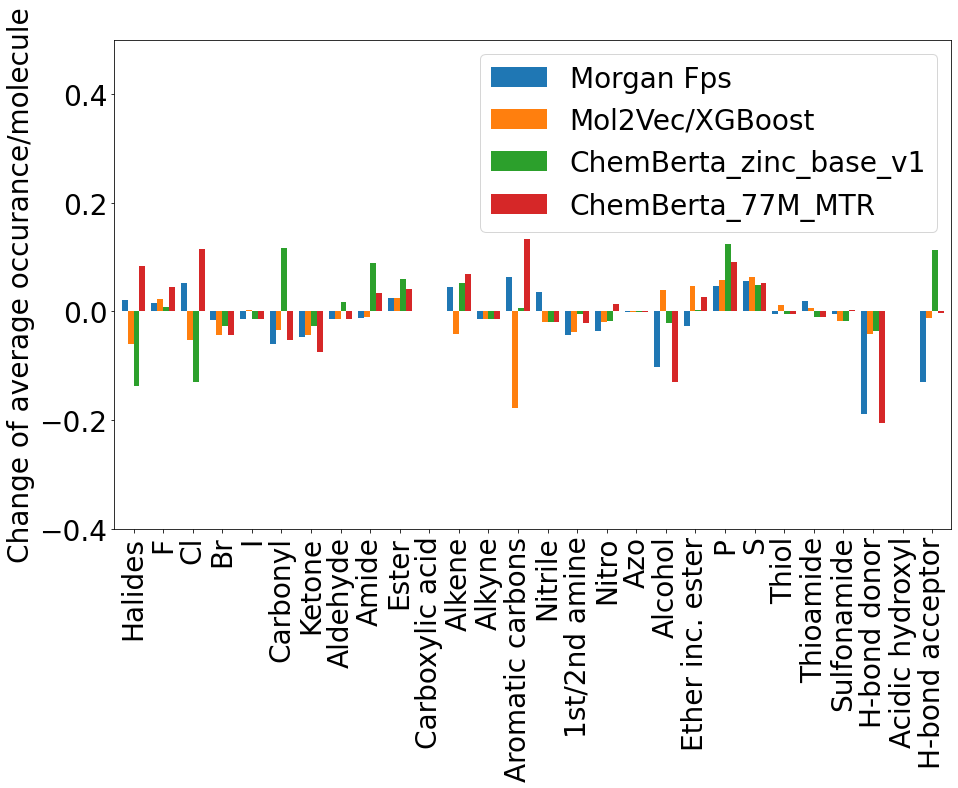

In [34]:
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge_change.plot.bar(figsize=(15,9), ylim = (-0.4, 0.5), width=0.8)
ax.set_ylabel("Change of average occurance/molecule", size=28)